[![View notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PySDM/blob/main/examples/PySDM_examples/Singer_Ward/MWE_joss_paper.ipynb)
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=lab/tree/examples/PySDM_examples/Singer_Ward/MWE_joss_paper.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/Singer_Ward/MWE_joss_paper.ipynb)

#### MWE for JOSSv2 paper code snippets

In [1]:
from PySDM import Formulae
from PySDM.physics import si
from PySDM_examples.Singer_organics.aerosol import AerosolBetaCaryophylleneDark
from PySDM_examples.Singer_organics.constants_def import SINGER_CONSTS, plot_colors, plot_lines, plot_names

formulae_bulk = Formulae(surface_tension='Constant', constants=SINGER_CONSTS)
aerosol = AerosolBetaCaryophylleneDark(water_molar_volume=formulae_bulk.constants.water_molar_volume)
formulae_ovad = Formulae(
    surface_tension='CompressedFilmOvadnevaite',
    constants={
        'sgm_org': 35 * si.mN / si.m,
        'delta_min': 1.75 * si.nm,
        **SINGER_CONSTS
    }
)
formulae_ruehl = Formulae(
    surface_tension='CompressedFilmRuehl',
    constants={
        'RUEHL_nu_org': aerosol.modes[0]['nu_org'],
        'RUEHL_A0': 115e-20 * si.m * si.m,
        'RUEHL_C0': 6e-7,
        'RUEHL_m_sigma': 0.3e17 * si.J / si.m**2,
        'RUEHL_sgm_min': 35 * si.mN / si.m,
        **SINGER_CONSTS
    }
)
formulae_sl = Formulae(
    surface_tension='SzyszkowskiLangmuir',
    constants={
        'RUEHL_nu_org': aerosol.modes[0]['nu_org'],
        'RUEHL_A0': 115e-20 * si.m * si.m,
        'RUEHL_C0': 6e-7,
        'RUEHL_sgm_min': 35 * si.mN / si.m,
        **SINGER_CONSTS
    }
)

<string>:29: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
/Users/claresinger/opt/anaconda3/envs/pysdm/lib/python3.10/site-packages/numba/core/utils.py:612: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",


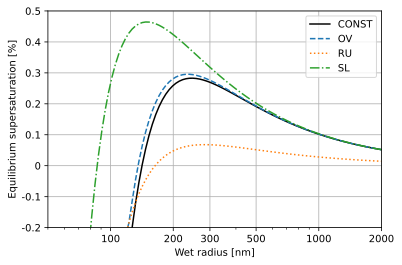

HTML(value="<a href='./joss_v2_paper_figure.pdf' target='_blank'>./joss_v2_paper_figure.pdf</a><br>")

In [2]:
import numpy as np
from matplotlib import pyplot
from open_atmos_jupyter_utils import show_plot

for formulae in (formulae_bulk, formulae_ovad, formulae_ruehl, formulae_sl):    
    r_wet = np.logspace(np.log(50 * si.nm), np.log(2000 * si.nm), base=np.e, num=100)
    sigma = np.ones(len(r_wet))
    for j,vw in enumerate(formulae_ovad.trivia.volume(r_wet)):
        sigma[j] = formulae.surface_tension.sigma(
            300 * si.K,
            vw,
            formulae_ovad.trivia.volume(50 * si.nm),
            aerosol.modes[0]['f_org']
        )
    RH_eq = formulae.hygroscopicity.RH_eq(
        r_wet,
        300 * si.K,
        aerosol.modes[0]['kappa'][formulae.surface_tension.__name__],
        (50 * si.nm)**3,
        sigma
    )
    model = formulae.surface_tension.__name__
    pyplot.plot(
        r_wet / si.nm,
        (RH_eq - 1)*100,
        label=plot_names[model],
        color=plot_colors[model],
        linestyle=plot_lines[model]
    )
pyplot.grid()
pyplot.legend(loc=0)
pyplot.xscale('log')
r_wet_ticks_nm = (100, 200, 300, 500, 1000, 2000)
pyplot.xticks(r_wet_ticks_nm, r_wet_ticks_nm)
pyplot.xlim(r_wet[0] / si.nm, r_wet[-1] / si.nm)
pyplot.ylabel('Equilibrium supersaturation [%]')
yticks = (-.2, -.1, 0, .1, .2, .3, .4, .5)
pyplot.yticks(yticks, yticks)
pyplot.ylim(yticks[0], .5)
pyplot.xlabel('Wet radius [nm]')
show_plot("joss_v2_paper_figure.pdf")